<a href="https://colab.research.google.com/github/vfrantc/weather_experiments/blob/main/run_desnownet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Jul 15 11:01:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
!git clone https://github.com/vfrantc/DesnowNet_Context-Aware_Deep_Network_for_Snow_Removal.git

Cloning into 'DesnowNet_Context-Aware_Deep_Network_for_Snow_Removal'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 61 (delta 7), reused 57 (delta 5), pack-reused 0
Unpacking objects: 100% (61/61), done.


In [4]:
%cd DesnowNet_Context-Aware_Deep_Network_for_Snow_Removal

/content/DesnowNet_Context-Aware_Deep_Network_for_Snow_Removal


In [5]:
!cp /content/drive/MyDrive/weather_experiments/weather_test.zip .
!unzip weather_test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/outdoor/input/0194_1_0.2.jpg  
  inflating: test/outdoor/input/1986_0.9_0.08.jpg  
  inflating: test/outdoor/input/0251_0.8_0.16.jpg  
  inflating: test/outdoor/input/1953_0.8_0.2.jpg  
  inflating: test/outdoor/input/0127_0.8_0.2.jpg  
  inflating: test/outdoor/input/0003_0.8_0.2.jpg  
  inflating: test/outdoor/input/1861_0.85_0.2.jpg  
  inflating: test/outdoor/input/0317_0.85_0.08.jpg  
  inflating: test/outdoor/input/0269_0.95_0.2.jpg  
  inflating: test/outdoor/input/1055_0.95_0.2.jpg  
  inflating: test/outdoor/input/0267_0.9_0.16.jpg  
  inflating: test/outdoor/input/1848_0.8_0.12.jpg  
  inflating: test/outdoor/input/0082_0.85_0.16.jpg  
  inflating: test/outdoor/input/0138_0.9_0.08.jpg  
  inflating: test/outdoor/input/1724_0.95_0.2.jpg  
  inflating: test/outdoor/input/1889_0.85_0.08.jpg  
  inflating: test/outdoor/input/0302_0.9_0.16.jpg  
  inflating: test/outdoor/input/1868_1_0.08.jpg  
  inflating: test/

In [6]:
!mkdir ./log
!cp /content/drive/MyDrive/checkpoints_ite50000.pth ./log

In [7]:
!ls test/snow/input

snow_storm-001.jpg  snow_storm-066.jpg	snow_storm-145.jpg  snow_storm-263.jpg
snow_storm-002.jpg  snow_storm-067.jpg	snow_storm-147.jpg  snow_storm-265.jpg
snow_storm-003.jpg  snow_storm-068.jpg	snow_storm-149.jpg  snow_storm-267.jpg
snow_storm-004.jpg  snow_storm-069.jpg	snow_storm-151.jpg  snow_storm-269.jpg
snow_storm-005.jpg  snow_storm-070.jpg	snow_storm-153.jpg  snow_storm-271.jpg
snow_storm-006.jpg  snow_storm-071.jpg	snow_storm-156.jpg  snow_storm-273.jpg
snow_storm-007.jpg  snow_storm-072.jpg	snow_storm-158.jpg  snow_storm-275.jpg
snow_storm-008.jpg  snow_storm-073.jpg	snow_storm-160.jpg  snow_storm-279.jpg
snow_storm-009.jpg  snow_storm-074.jpg	snow_storm-162.jpg  snow_storm-281.jpg
snow_storm-010.jpg  snow_storm-075.jpg	snow_storm-164.jpg  snow_storm-283.jpg
snow_storm-011.jpg  snow_storm-076.jpg	snow_storm-166.jpg  snow_storm-285.jpg
snow_storm-012.jpg  snow_storm-077.jpg	snow_storm-168.jpg  snow_storm-289.jpg
snow_storm-013.jpg  snow_storm-078.jpg	snow_storm-170.jpg  snow_

In [8]:
!mkdir -p desnownet/snow

In [10]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/vfrantc/DesnowNet_Context-Aware_Deep_Network_for_Snow_Removal
   04b3204..a7f58d7  main       -> origin/main
Updating 04b3204..a7f58d7
Fast-forward
 inference.py | 92 +++++++++++++++++++-----------------------------------------
 1 file changed, 29 insertions(+), 63 deletions(-)


In [14]:
ls test/snow/input

snow_storm-001.jpg  snow_storm-066.jpg  snow_storm-145.jpg  snow_storm-263.jpg
snow_storm-002.jpg  snow_storm-067.jpg  snow_storm-147.jpg  snow_storm-265.jpg
snow_storm-003.jpg  snow_storm-068.jpg  snow_storm-149.jpg  snow_storm-267.jpg
snow_storm-004.jpg  snow_storm-069.jpg  snow_storm-151.jpg  snow_storm-269.jpg
snow_storm-005.jpg  snow_storm-070.jpg  snow_storm-153.jpg  snow_storm-271.jpg
snow_storm-006.jpg  snow_storm-071.jpg  snow_storm-156.jpg  snow_storm-273.jpg
snow_storm-007.jpg  snow_storm-072.jpg  snow_storm-158.jpg  snow_storm-275.jpg
snow_storm-008.jpg  snow_storm-073.jpg  snow_storm-160.jpg  snow_storm-279.jpg
snow_storm-009.jpg  snow_storm-074.jpg  snow_storm-162.jpg  snow_storm-281.jpg
snow_storm-010.jpg  snow_storm-075.jpg  snow_storm-164.jpg  snow_storm-283.jpg
snow_storm-011.jpg  snow_storm-076.jpg  snow_storm-166.jpg  snow_storm-285.jpg
snow_storm-012.jpg  snow_storm-077.jpg  snow_storm-168.jpg  snow_storm-289.jpg
snow_storm-013.jpg  snow_storm-078.jpg  snow_storm-1

In [18]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/vfrantc/DesnowNet_Context-Aware_Deep_Network_for_Snow_Removal
   f01975e..15359a4  main       -> origin/main
Updating f01975e..15359a4
Fast-forward
 inference.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [23]:
!ls test/Snow100K-L/input

Streaming output truncated to the last 5000 lines.
 winter_japan_10412.jpg
 winter_japan_10413.jpg
 winter_japan_10440.jpg
 winter_japan_10453.jpg
 winter_japan_10464.jpg
 winter_japan_10475.jpg
 winter_japan_10480.jpg
 winter_japan_10493.jpg
 winter_japan_10501.jpg
 winter_japan_10512.jpg
 winter_japan_10528.jpg
 winter_japan_10537.jpg
 winter_japan_10551.jpg
 winter_japan_10569.jpg
 winter_japan_10571.jpg
 winter_japan_10578.jpg
 winter_japan_10600.jpg
 winter_japan_10620.jpg
 winter_japan_10621.jpg
 winter_japan_10624.jpg
 winter_japan_10625.jpg
 winter_japan_10644.jpg
 winter_japan_10645.jpg
 winter_japan_10648.jpg
 winter_japan_10653.jpg
 winter_japan_10655.jpg
 winter_japan_10661.jpg
 winter_japan_10671.jpg
 winter_japan_10678.jpg
 winter_japan_10682.jpg
 winter_japan_10691.jpg
 winter_japan_10721.jpg
 winter_japan_10723.jpg
 winter_japan_10725.jpg
 winter_japan_10727.jpg
 winter_japan_10739.jpg
 winter_japan_10741.jpg
 winter_japan_10742.jpg
 winter_japan_10750.jpg
 winter_japan

In [25]:
!mkdir -p desnownet/Snow100K-L

In [26]:
!python3 inference.py --device cuda -dir ./log -in_dir test/Snow100K-L/input -out_dir desnownet/Snow100K-L --checkpoint 50000

load checkpoints(iteration=50000)
  0% 9/16801 [00:17<9:17:38,  1.99s/it]
Traceback (most recent call last):
  File "inference.py", line 98, in <module>
    y_hat, y_, z_hat, a = net(img_tensor)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "/content/DesnowNet_Context-Aware_Deep_Network_for_Snow_Removal/network/DesnowNet.py", line 106, in forward
    y_, f_c, z_hat, a = self.TR(x, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "/content/DesnowNet_Context-Aware_Deep_Network_for_Snow_Removal/network/DesnowNet.py", line 15, in forward
    f_t = self.D_t(x)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "./network/Descriptor.py", line 33, in forward
    f = self.DP(feature)
 

In [ ]:
!zip -r desnownet.zip desnownet
!cp desnownet.zip /content/drive/weather_experiments/

In [27]:
!ls desnownet/Snow100K-L

 city_read_02414.jpg	 school_night_00481.jpg
 city_read_07891.jpg	'sidewalk winter -grayscale -gray_05192.jpg'
 city_read_19354.jpg	'sidewalk winter -grayscale -gray_06243.jpg'
 parking_lot_03375.jpg	 winter_weather_01225.jpg
 parking_lot_04464.jpg


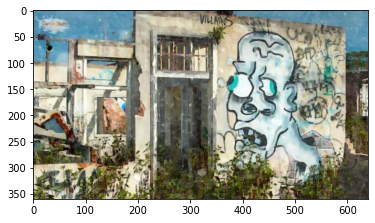

In [34]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('desnownet/Snow100K-L/winter_weather_01225.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()